In [1]:
import pyforest

In [2]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
model_types = ['GP', 'RF']
feat_types=['MOE','MFP']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
samplings = ['none_scaled','UNDER','SMOTE']
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
gp_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
col_order = ['NEK', 'feat_type', 'strategy','modeling_type', 'compound_id', 'active', 'prediction' , 'RF_type']


ideas 
- see overlapping molecules between all test sets
- then see if it's in test/train

In [3]:
all_neks = []
# all_nek_dfs=pd.DataFrame()
for nek in neks: 
    df_orig = pd.read_csv(f'{df_path}{nek}_MFP_none_scaled.csv')
    df_UNDER = pd.read_csv(f'{df_path}{nek}_MFP_UNDER.csv')
    # all_neks.append(df_orig[df_orig['subset']=='test']) 
    # all_neks.append(df_UNDER[df_UNDER['subset']=='test']) 
    
    unique_cmpds = set(df_orig['compound_id']).intersection(set(df_UNDER['compound_id']))
    
    unique_cmpds_nek = df_orig[df_orig['compound_id'].isin(unique_cmpds)]
    unique_cmpds_nek_test=unique_cmpds_nek[unique_cmpds_nek['subset']=='test']
    all_neks.append(unique_cmpds_nek_test)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
def common_unique_values(list1, list2, *lists):
    sets = [set(list1), set(list2)]
    for lst in lists:
        sets.append(set(lst))
    return set.intersection(*sets)


In [29]:
all_dfs = [] 
all_neks = []
for nek in neks:  
    full_df = pd.read_csv(f'{df_path}{nek}_MFP_none_scaled.csv') 
    # full_df=full_df[full_df['subset']=='train']
    all_dfs.append(full_df)
    all_neks.append(nek) 
    
df_dict = {}
for df, nek in zip(all_dfs, all_neks):
    df_dict[nek] = df


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
NEK2_binding=df_dict['NEK2_binding']
NEK2_inhibition=df_dict['NEK2_inhibition']  
NEK3_binding=df_dict['NEK3_binding']
NEK5_binding=df_dict['NEK5_binding']
NEK9_binding=df_dict['NEK9_binding']
NEK9_inhibition=df_dict['NEK9_inhibition']   

In [31]:
nek2inhibtest=NEK2_inhibition[NEK2_inhibition['subset']=='test']
nek9inhibtest=NEK9_inhibition[NEK9_inhibition['subset']=='test']
common_inhib_test=common_unique_values(list(nek2inhibtest['compound_id'].values),list(nek9inhibtest['compound_id'].values))
common_inhib_test

{'kdb_2013',
 'kdb_2212',
 'kdb_2238',
 'kdb_2908',
 'kdb_3160',
 'kdb_3164',
 'kdb_3211',
 'kdb_3224',
 'kdb_3232',
 'kdb_3241',
 'kdb_3264',
 'kdb_3290',
 'kdb_3305',
 'kdb_3330',
 'kdb_3334'}

In [64]:
nek2bindtest=NEK2_binding[NEK2_binding['subset']=='test']
nek9bindtest=NEK9_binding[NEK9_binding['subset']=='test']
nek3bindtest=NEK3_binding[NEK3_binding['subset']=='test']
nek5bindtest=NEK5_binding[NEK5_binding['subset']=='test']
common_binding_test = common_unique_values(list(nek2bindtest['compound_id'].values),list(nek9bindtest['compound_id'].values),
                           list(nek3bindtest['compound_id'].values),list(nek5bindtest['compound_id'].values)     )
common_binding_test

{'kdb_2181'}

In [57]:
nek9_inhib_selects=[]
nek2_inhib_selects=[]

for cmpd in common_inhib_test:
    for nek_df in [NEK2_inhibition, NEK9_inhibition]: 
        nek_val = nek_df['NEK'].values[0]
        match = nek_df[nek_df['compound_id'] == cmpd][['compound_id','active']]
        # print(match)
        if nek_val == 'NEK2_inhibition':
            nek2_inhib_selects.append(match)
        elif nek_val == 'NEK9_inhibition':
            nek9_inhib_selects.append(match)


In [68]:
nek9inhib_df = pd.concat(nek9_inhib_selects).reset_index(drop=True)
nek2inhib_df = pd.concat(nek2_inhib_selects).reset_index(drop=True)
inhibition_selectivity = pd.merge(nek2inhib_df,nek9inhib_df, on='compound_id',
                        how='outer',suffixes=('_NEK2_inhibition','_NEK9_inhibition'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
inhibition_selectivity

,compound_id,active_NEK2_inhibition,active_NEK9_inhibition
0,kdb_3330,0,0
1,kdb_2212,0,0
2,kdb_3211,0,0
3,kdb_3160,0,0
4,kdb_2013,0,0
5,kdb_3164,0,0
6,kdb_3264,1,0
7,kdb_3290,0,0
8,kdb_2908,0,0
9,kdb_3305,0,0


In [72]:
nek9_bind_selects=[]
nek2_bind_selects=[]
nek3_bind_selects=[]
nek5_bind_selects=[]

for cmpd in common_binding_test:
    for nek_df in [NEK2_binding, NEK3_binding,NEK5_binding,NEK9_binding ]: 
        nek_val = nek_df['NEK'].values[0]
        match = nek_df[nek_df['compound_id'] == cmpd][['compound_id','active']]
        # print(match)
        if nek_val == 'NEK2_binding':
            nek2_bind_selects.append(match)
        elif nek_val == 'NEK3_binding':
            nek3_bind_selects.append(match)
        elif nek_val == 'NEK5_binding':
            nek5_bind_selects.append(match)
        elif nek_val == 'NEK9_binding':
            nek9_bind_selects.append(match)
nek9bind_df = pd.concat(nek9_bind_selects).reset_index(drop=True)
nek2bind_df = pd.concat(nek2_bind_selects).reset_index(drop=True)
nek3bind_df = pd.concat(nek3_bind_selects).reset_index(drop=True)
nek5bind_df = pd.concat(nek5_bind_selects).reset_index(drop=True)
nek3bind_df = nek3bind_df.rename(columns={'active':'active_NEK3_binding'})
nek5bind_df = nek5bind_df.rename(columns={'active':'active_NEK5_binding'})
binding_selectivity = pd.merge(nek2bind_df,nek9bind_df, on='compound_id',
                               how='outer',suffixes=('_NEK2_binding', '_NEK9_binding'))

binding_selectivity = pd.merge(binding_selectivity, nek5bind_df, on='compound_id', how='outer')
binding_selectivity = pd.merge(binding_selectivity, nek3bind_df, on='compound_id', how='outer')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
binding_selectivity

,compound_id,active_NEK2_binding,active_NEK9_binding,active_NEK5_binding,active_NEK3_binding
0,kdb_2181,0,0,0,0


In [ ]:
def rename_for_nek(df, nek_label):
    df = df.copy()
    for col in df.columns:
        if col not in ['compound_id','active']:
            if not col.startswith('NEK'):
                df.rename(columns={col:f'{col}_{nek_label}'}, inplace=True)
    return df


In [178]:
from functools import reduce
merged_dfs = []
nek_labels = []
for nek_df in [NEK2_inhibition, NEK9_inhibition]:
    df_list = []
    model_list=[]
    nek_val=nek_df['NEK'].values[0]
    
    for model in ['UNDER_GP_matern','none_scaled_BRFC'] : 
        rf_model_label = 'BRFC'
        if (nek_val=='NEK9_inhibition' and model=='none_scaled_BRFC'): 
            model ='none_scaled_BRFC_BCW'
            rf_model_label= 'BRFC_BCW'
        print(nek_val, model)
        model_list.append(model)
        df = pd.read_csv(f'{cmpd_df_path}{nek_val}_MFP_{model}_cmpd_class.csv')
        df2=df[df['compound_id'].isin(list(common_inhib_test))]
        keep_cols = ['NEK', 'compound_id','active','prediction','UQ_metric_value'] 
        df2=df2[keep_cols]
       
        df_list.append(df2) 
    
    merged = df_list[0].merge(df_list[1], on=['compound_id','NEK','active'], suffixes=('_GP', f'_{rf_model_label}'))
    display(merged)
    merged_dfs.append(merged)    

inhib_uqs = pd.merge(left=merged_dfs[0],right=merged_dfs[1], on=['compound_id', 'active'],
                     suffixes=('_NEK2_inhibition', 'NEK9_inhibition'))


NEK2_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK2_inhibition none_scaled_BRFC


<IPython.core.display.Javascript object>

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_BRFC,UQ_metric_value_BRFC
0,NEK2_inhibition,kdb_2013,0,0,3.641125,0,0.451261
1,NEK2_inhibition,kdb_2212,0,0,3.569157,0,0.435194
2,NEK2_inhibition,kdb_2238,0,0,2.871379,1,0.451261
3,NEK2_inhibition,kdb_2908,0,0,3.308633,0,0.416333
4,NEK2_inhibition,kdb_3160,0,0,3.308633,0,0.416333
5,NEK2_inhibition,kdb_3164,0,0,3.309711,0,0.196946
6,NEK2_inhibition,kdb_3211,0,0,3.467363,0,0.358870
7,NEK2_inhibition,kdb_3224,0,1,3.748984,1,0.496045
8,NEK2_inhibition,kdb_3232,0,0,3.713614,0,0.435194
9,NEK2_inhibition,kdb_3241,0,0,3.812407,0,0.358870


NEK9_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK9_inhibition none_scaled_BRFC_BCW


<IPython.core.display.Javascript object>

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_BRFC_BCW,UQ_metric_value_BRFC_BCW
0,NEK9_inhibition,kdb_2013,0,0,4.659319,0,0.272660
1,NEK9_inhibition,kdb_2212,0,0,5.097590,0,0.394277
2,NEK9_inhibition,kdb_2238,0,0,4.867220,0,0.140705
3,NEK9_inhibition,kdb_2908,0,0,5.113848,0,0.490207
4,NEK9_inhibition,kdb_3160,0,0,5.113848,0,0.490207
5,NEK9_inhibition,kdb_3164,0,0,3.745038,0,0.100000
6,NEK9_inhibition,kdb_3211,0,0,5.007483,0,0.196946
7,NEK9_inhibition,kdb_3224,0,1,3.463052,0,0.100000
8,NEK9_inhibition,kdb_3232,0,0,4.581771,0,0.238683
9,NEK9_inhibition,kdb_3241,0,0,4.559249,0,0.487832


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

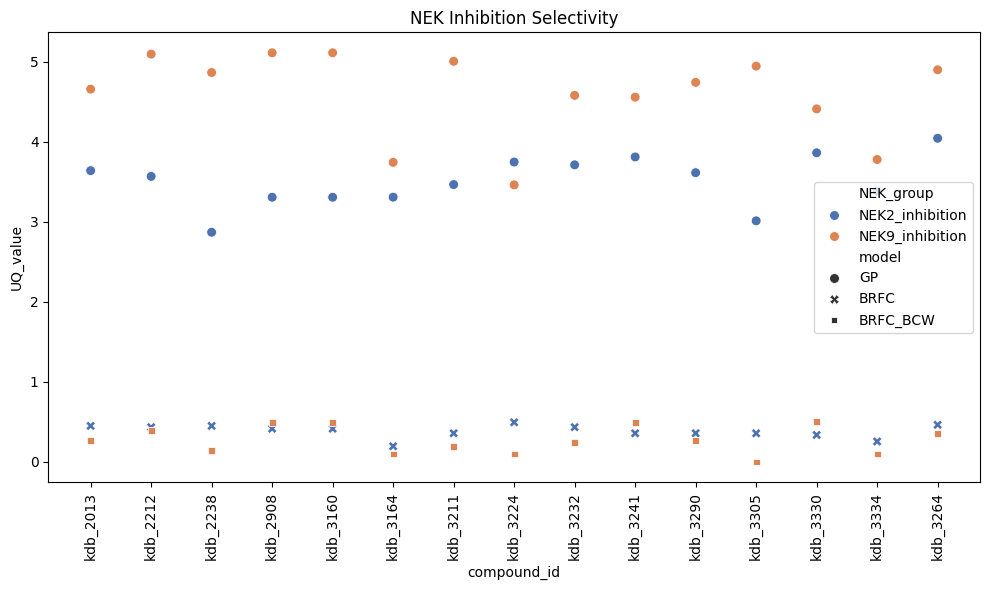

In [179]:
# fig_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/figs/UQ_point_comparison/'
df1 = pd.melt(merged_dfs[0], id_vars=['compound_id','NEK','active'],value_vars=['UQ_metric_value_GP', 'UQ_metric_value_BRFC'],
    var_name='model',value_name='UQ_value')
df1['NEK_group'] = 'NEK2_inhibition'

df2 = pd.melt(merged_dfs[1], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_BRFC_BCW'],
    var_name='model',value_name='UQ_value')
df2['NEK_group'] = 'NEK9_inhibition'
all_df = pd.concat([df1, df2])
all_df['model'] = all_df['model'].str.replace('UQ_metric_value_', '')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_df,x='compound_id',y='UQ_value',
    hue='NEK_group',style='model',palette='deep',s=50)
plt.xticks(rotation=90)
plt.title('NEK Inhibition Selectivity')
plt.tight_layout()
plt.savefig(f'inhibition_selectivity.png', bbox_inches='tight')
plt.show()


In [88]:
nek9_inhib_values = []
nek2_inhib_values=[]
for cmpd in common_inhib_test:
    for nek_df in [NEK2_inhibition, NEK9_inhibition]:
        df_list = []
        model_list=[]
        nek_val = nek_df['NEK'].iloc[0]
        # match = nek_df[nek_df['compound_id'] == cmpd]
        
        for model in ['UNDER_GP_matern', 'none_scaled_BRFC']:
            model_version = model
            model_df =pd.read_csv(f'{cmpd_df_path}{nek}_MFP_{model}_cmpd_class.csv')
            match = model_df[model_df['compound_id'] == cmpd]
            if nek_val == 'NEK9_inhibition' and model == 'none_scaled_BRFC':
                model_version = 'none_scaled_BRFC_BCW'
            row = match[match['model_version'] == model_version]
            if row.empty:
                continue

            result = {'compound_id':cmpd,'NEK': nek_val,'model': model,'model_version':model_version,
                'active':row['active'].values[0],'prediction':row['prediction'].values[0],
                'prediction_type':row['prediction_type'].values[0],
                'UQ_metric_value': row['UQ_metric_value'].values[0] }


            if nek_val == 'NEK2_inhibition':
                nek2_inhib_values.append(result)
            elif nek_val == 'NEK9_inhibition':
                nek9_inhib_values.append(result)


nek2inhib_df_final = pd.DataFrame(nek2_inhib_values)
nek9inhib_df_final = pd.DataFrame(nek9_inhib_values)
combined_df = pd.DataFrame(nek2_inhib_values+nek9_inhib_values)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Binding test overlaps ## 

In [143]:
# nek2bindtest=NEK2_binding[NEK2_binding['subset']=='test']
# nek9bindtest=NEK9_binding[NEK9_binding['subset']=='test']
# nek3bindtest=NEK3_binding[NEK3_binding['subset']=='test']
# nek5bindtest=NEK5_binding[NEK5_binding['subset']=='test']
binding_neks = [nek2bindtest,nek3bindtest,nek5bindtest,nek9bindtest]
binding_neks_len = 4 
count = 0 
for i in range(binding_neks_len): 
    for j in range(i+1, binding_neks_len): 
        ij_overlap = common_unique_values(list(binding_neks[i]['compound_id'].values),list(binding_neks[j]['compound_id'].values))
        print(f"{binding_neks[i]['NEK'].iloc[0]} overlap with {binding_neks[j]['NEK'].iloc[0]}")
        print(len(ij_overlap))

NEK2_binding overlap with NEK3_binding
64
NEK2_binding overlap with NEK5_binding
46
NEK2_binding overlap with NEK9_binding
72
NEK3_binding overlap with NEK5_binding
40
NEK3_binding overlap with NEK9_binding
64
NEK5_binding overlap with NEK9_binding
46


In [148]:
dfis=[]
dfjs=[]
dfks = []
overlaps3 = []
num_cmpds = [] 
for i in range(binding_neks_len): 
    for j in range(i+1, binding_neks_len): 
        for k in range(j+1, binding_neks_len): 
            ijk_overlap = common_unique_values(list(binding_neks[i]['compound_id'].values),
                                               list(binding_neks[j]['compound_id'].values),
                                              list(binding_neks[k]['compound_id'].values))
            print(f"{binding_neks[i]['NEK'].iloc[0]} overlap with {binding_neks[j]['NEK'].iloc[0]} and {binding_neks[k]['NEK'].iloc[0]}")
            print(len(ijk_overlap))
            dfis.append(f"{binding_neks[i]['NEK'].iloc[0]}")
            dfjs.append(f"{binding_neks[j]['NEK'].iloc[0]}")
            dfks.append(f"{binding_neks[k]['NEK'].iloc[0]}")
            overlaps3.append(ijk_overlap)
            num_cmpds.append(len(ijk_overlap))
overlap3_list_df =  pd.DataFrame({'NEK_i': dfis, 'NEK_j': dfjs, 'NEK_k':dfks, 'overlap': overlaps3,
                                 'num compounds in overlap': num_cmpds})       

NEK2_binding overlap with NEK3_binding and NEK5_binding
12
NEK2_binding overlap with NEK3_binding and NEK9_binding
18
NEK2_binding overlap with NEK5_binding and NEK9_binding
11
NEK3_binding overlap with NEK5_binding and NEK9_binding
4


<IPython.core.display.Javascript object>

In [149]:
overlap3_list_df


,NEK_i,NEK_j,NEK_k,overlap,num compounds in overlap
0,NEK2_binding,NEK3_binding,NEK5_binding,"{kdb_3007, kdb_2749, kdb_2493, kdb_2590, kdb_2...",12
1,NEK2_binding,NEK3_binding,NEK9_binding,"{kdb_2718, kdb_2131, kdb_1219, kdb_2221, kdb_2...",18
2,NEK2_binding,NEK5_binding,NEK9_binding,"{kdb_2225, kdb_63, kdb_168, kdb_1512, kdb_2531...",11
3,NEK3_binding,NEK5_binding,NEK9_binding,"{kdb_2827, kdb_2181, kdb_2293, kdb_2530}",4


In [213]:
nek2_bind_selects=[]
nek3_bind_selects=[]
nek5_bind_selects=[]
nek9_bind_selects=[]


for cmpd in list(overlap3_list_df.iloc[0]['overlap']): # overlap of 2, 3, 5
    for nek_df in [NEK2_binding, NEK3_binding, NEK5_binding]: 
        nek_val = nek_df['NEK'].values[0]
        match = nek_df[nek_df['compound_id'] == cmpd][['compound_id','active']]
        # print(match)
        if nek_val == 'NEK2_binding':
            nek2_bind_selects.append(match)
        elif nek_val == 'NEK3_binding':
            nek3_bind_selects.append(match)
        elif nek_val == 'NEK5_binding':
            nek5_bind_selects.append(match)
        elif nek_val == 'NEK9_binding':
            nek9_bind_selects.append(match)
nek2bind_df = pd.concat(nek2_bind_selects).reset_index(drop=True)
nek3bind_df = pd.concat(nek3_bind_selects).reset_index(drop=True)
nek5bind_df = pd.concat(nek5_bind_selects).reset_index(drop=True)
nek23bind_selectivity = pd.merge(nek2bind_df,nek3bind_df, on='compound_id',
                        how='outer',suffixes=('_NEK2_binding','_NEK3_binding'))
nek235bind_selectivity = pd.merge(nek23bind_selectivity,nek5bind_df, on='compound_id',
                        how='outer',suffixes=('_prev','_NEK5_binding'))
nek239bind_selectivity = pd.merge(nek23bind_selectivity,nek9bind_df, on='compound_id',
                        how='outer',suffixes=('_prev','_NEK9_binding'))
nek59bind_selectivity = pd.merge(nek5bind_df,nek9bind_df, on='compound_id',
                        how='outer',suffixes=('_NEK5_binding','_NEK9_binding'))

nek259bind_selectivity = pd.merge(nek59bind_selectivity,nek2bind_df, on='compound_id',
                        how='outer',suffixes=('_prev','_NEK2_binding'))
nek359bind_selectivity = pd.merge(nek59bind_selectivity,nek2bind_df, on='compound_id',
                        how='outer',suffixes=('_prev','_NEK3_binding'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
merged_dfs = []
nek_labels = []
from functools import reduce
for nek_df in [NEK2_binding, NEK3_binding, NEK5_binding]:
    df_list = []
    model_list=[]
    nek_val=nek_df['NEK'].values[0]
    nek_labels.append(nek_val)
    
    for model in ['UNDER_GP_matern','none_scaled_BRFC'] : 
        print(nek_val, model)
        model_list.append(model)
        df = pd.read_csv(f'{cmpd_df_path}{nek_val}_MFP_{model}_cmpd_class.csv')
        
        df2=df[df['compound_id'].isin(list(nek235bind_selectivity['compound_id'].values))]

        keep_cols = ['NEK', 'compound_id','active','prediction','UQ_metric_value'] 
        df2=df2[keep_cols]
       
        df_list.append(df2) 

    merged = df_list[0].merge(df_list[1],on=['compound_id','NEK','active'],suffixes=('_GP', f'_RF'))
    merged
    merged_dfs.append(merged)
final_merged = reduce(lambda left, right: pd.merge(left, right, on=['compound_id', 'active']),merged_dfs)


NEK2_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK2_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

NEK3_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK3_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

NEK5_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK5_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [265]:
len(merged_dfs)

3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

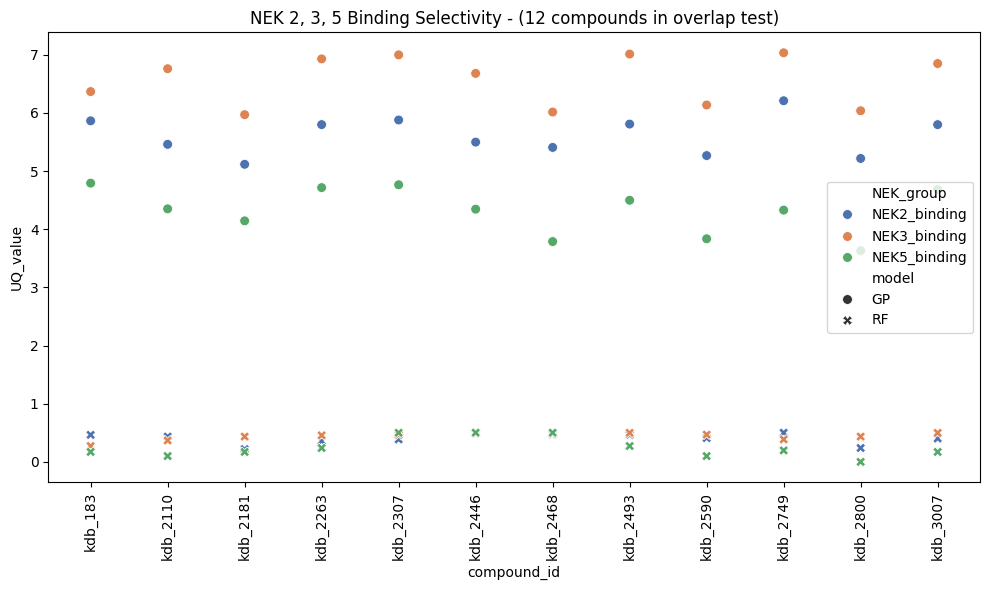

In [210]:
df1 = pd.melt(merged_dfs[0], id_vars=['compound_id','NEK','active'],value_vars=['UQ_metric_value_GP', 'UQ_metric_value_RF'],
    var_name='model',value_name='UQ_value')
df1['NEK_group'] = 'NEK2_binding'

df2 = pd.melt(merged_dfs[1], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_RF'],
    var_name='model',value_name='UQ_value')
df3 = pd.melt(merged_dfs[2], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_RF'],
    var_name='model',value_name='UQ_value')
df2['NEK_group'] = 'NEK3_binding'
df3['NEK_group'] = 'NEK5_binding'
all_df = pd.concat([df1, df2,df3])
all_df['model'] = all_df['model'].str.replace('UQ_metric_value_', '')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_df,x='compound_id',y='UQ_value',
    hue='NEK_group',style='model',palette='deep',s=50)
plt.xticks(rotation=90)
plt.title('NEK 2, 3, 5 Binding Selectivity - (12 compounds in overlap test)')
plt.tight_layout()
plt.savefig(f'binding235_selectivity.png', bbox_inches='tight')
plt.show()


In [280]:
selectivity_lists

,NEK_i,NEK_j,NEK_k,overlap,num compounds in overlap,selectivity df,NEKs
0,NEK2_binding,NEK3_binding,NEK5_binding,"{kdb_3007, kdb_2749, kdb_2493, kdb_2590, kdb_2...",12,compound_id active_NEK2_binding active_NE...,NEK2_binding_NEK3_binding_NEK5_binding
1,NEK2_binding,NEK3_binding,NEK9_binding,"{kdb_2718, kdb_2131, kdb_1219, kdb_2221, kdb_2...",18,compound_id active_NEK2_binding active_NE...,NEK2_binding_NEK3_binding_NEK9_binding
2,NEK2_binding,NEK5_binding,NEK9_binding,"{kdb_2225, kdb_63, kdb_168, kdb_1512, kdb_2531...",11,compound_id active_NEK5_binding active_NE...,NEK2_binding_NEK5_binding_NEK9_binding
3,NEK3_binding,NEK5_binding,NEK9_binding,"{kdb_2827, kdb_2181, kdb_2293, kdb_2530}",4,compound_id active_NEK5_binding active_NE...,NEK3_binding_NEK5_binding_NEK9_binding


NEK2_binding_NEK3_binding_NEK5_binding, 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

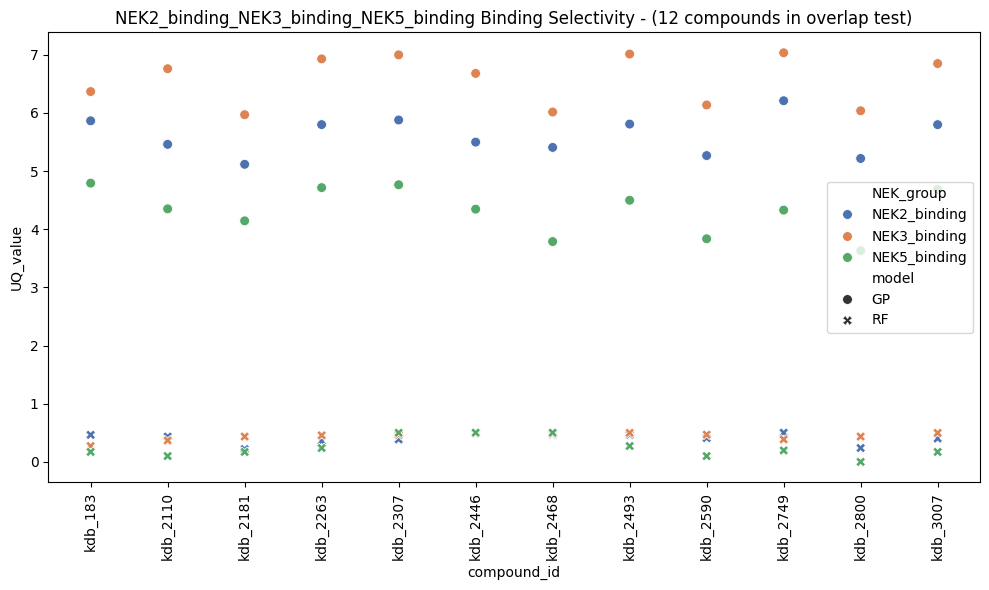

NEK2_binding_NEK3_binding_NEK9_binding, 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

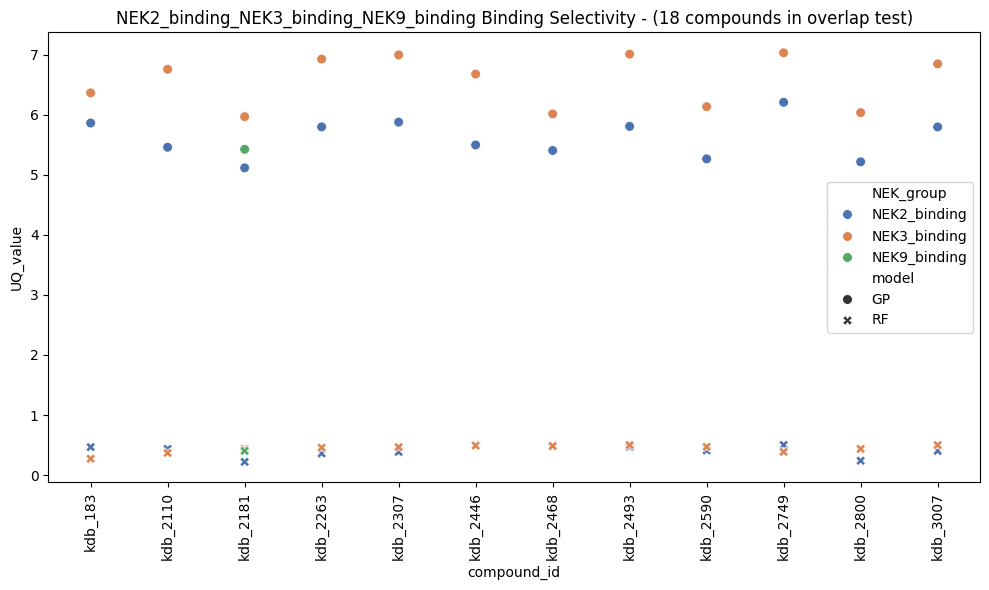

NEK2_binding_NEK5_binding_NEK9_binding, 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

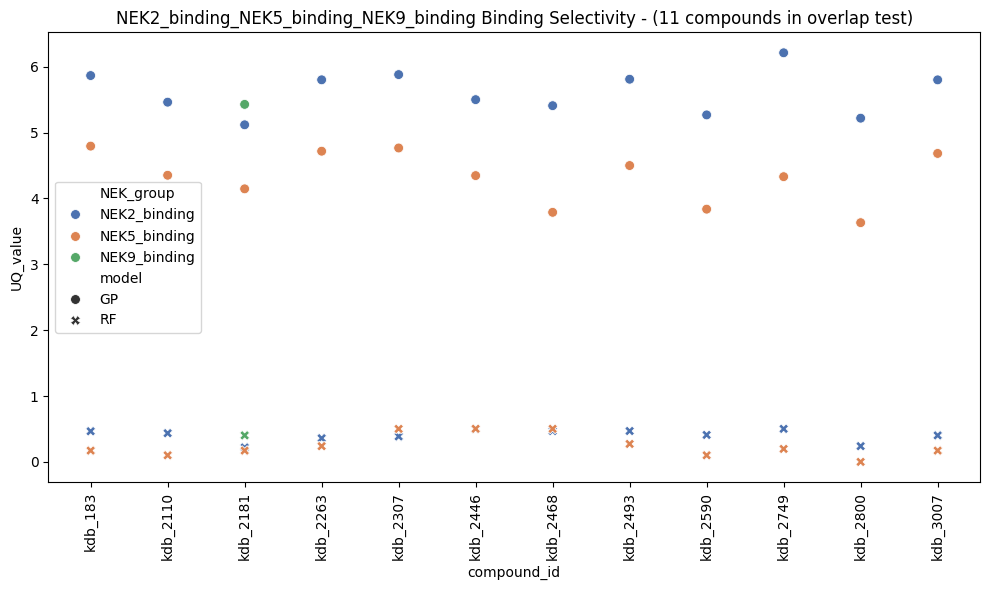

NEK3_binding_NEK5_binding_NEK9_binding, 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

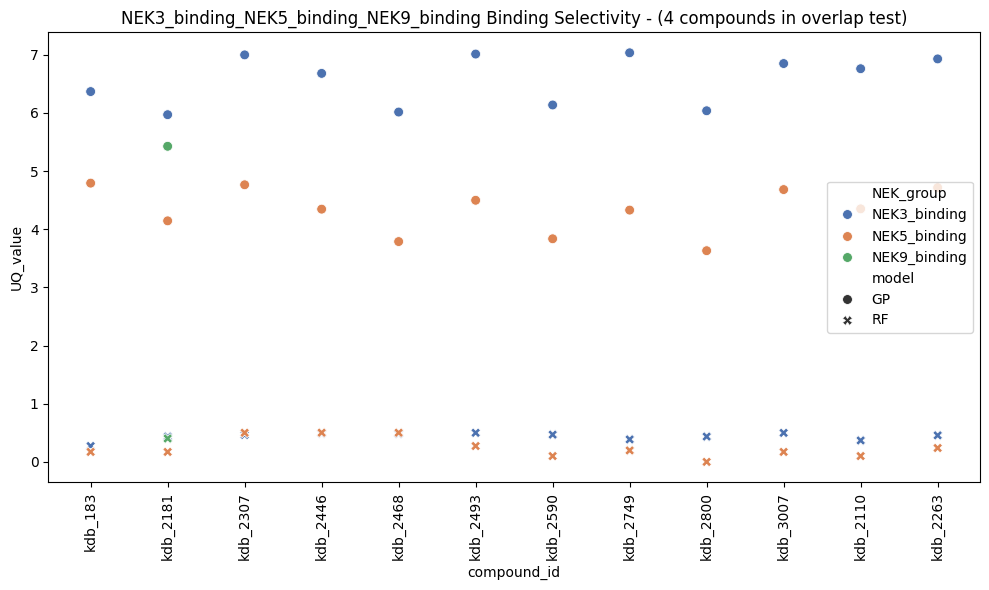

In [284]:
selectivity_lists = overlap3_list_df.copy()
selectivity_dfs = [nek235bind_selectivity,nek239bind_selectivity
                   ,nek259bind_selectivity,nek359bind_selectivity]
selectivity_lists['selectivity df'] = selectivity_dfs

selectivity_lists['NEKs'] = selectivity_lists['NEK_i'].astype(str)+'_'+selectivity_lists['NEK_j']+'_'+selectivity_lists['NEK_k']
merged_dfs = []
all_melted = []
for i in range(binding_neks_len): 
    for j in range(i+1, binding_neks_len): 
        for k in range(j+1, binding_neks_len):
            neksijk = [binding_neks[i], binding_neks[j], binding_neks[k]]
            
            
            nek_labels = [] 
            df_per_nek = []
            nek3 = f"{binding_neks[i]['NEK'].iloc[0]}_{binding_neks[j]['NEK'].iloc[0]}_{binding_neks[k]['NEK'].iloc[0]}"
            match_row = selectivity_lists[selectivity_lists['NEKs'] == nek3]
            compound_ids = match_row.iloc[0]['selectivity df']['compound_id'].tolist()
            num_cmpds = selectivity_lists[selectivity_lists['NEKs']==nek3]['num compounds in overlap'].values[0]
            merged_dfs=[]
            print(f'{nek3}, {num_cmpds}')
            for nek_df in neksijk: 
                df_list = []
                nek_val = nek_df['NEK'].values[0]
                nek_labels.append(nek_val)
                uq_data = {'compound_id':[],'NEK':[],'active':[]}
                for model in ['UNDER_GP_matern','none_scaled_BRFC'] : 
                    model_name = 'GP' if 'GP' in model else 'RF'
                    
                    model_list.append(model)
                    df = pd.read_csv(f'{cmpd_df_path}{nek_val}_MFP_{model}_cmpd_class.csv')
                    df2 = df[df['compound_id'].isin(compound_ids)]
                    keep_cols = ['NEK', 'compound_id','active','prediction','UQ_metric_value'] 
                    df2=df2[keep_cols]
                    df_list.append(df2) 
                    
                merged = df_list[0].merge(df_list[1],on=['compound_id','NEK','active'],suffixes=('_GP', '_RF'))
                merged
                merged_dfs.append(merged)
            df1 = pd.melt(merged_dfs[0],id_vars=['compound_id','NEK','active'],
                          value_vars=['UQ_metric_value_GP', 'UQ_metric_value_RF'],
                            var_name='model',value_name='UQ_value')
            df1['NEK_group'] = f"{binding_neks[i]['NEK'].iloc[0]}"
            
            df2 = pd.melt(merged_dfs[1], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_RF'],
                var_name='model',value_name='UQ_value')
            df3 = pd.melt(merged_dfs[2], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_RF'],
                var_name='model',value_name='UQ_value')
            df2['NEK_group'] = f"{binding_neks[j]['NEK'].iloc[0]}"
            df3['NEK_group'] =f"{binding_neks[k]['NEK'].iloc[0]}"
            all_df = pd.concat([df1, df2,df3])
            all_df['model'] = all_df['model'].str.replace('UQ_metric_value_', '')
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=all_df,x='compound_id',y='UQ_value',
                hue='NEK_group',style='model',palette='deep',s=50)
            plt.xticks(rotation=90)
            plt.title(f'{nek3} Binding Selectivity - ({num_cmpds} compounds in overlap test)')
            plt.tight_layout()
            plt.savefig(f'{nek3}_binding_selectivity.png', bbox_inches='tight')
            plt.show()
        
                                        

In [268]:
merged

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_RF,UQ_metric_value_RF
0,NEK9_binding,kdb_2181,0,0,5.427167,0,0.402015


In [271]:
merged_dfs[0]

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_RF,UQ_metric_value_RF
0,NEK3_binding,kdb_183,0,0,6.367945,0,0.272660
1,NEK3_binding,kdb_2181,0,0,5.970475,0,0.435194
2,NEK3_binding,kdb_2307,0,0,6.999008,0,0.464823
3,NEK3_binding,kdb_2446,0,1,6.680778,1,0.490207
4,NEK3_binding,kdb_2468,0,0,6.016094,1,0.485237
5,NEK3_binding,kdb_2493,0,1,7.013273,1,0.500000
6,NEK3_binding,kdb_2590,0,0,6.137454,0,0.468826
7,NEK3_binding,kdb_2749,0,1,7.034917,1,0.386123
8,NEK3_binding,kdb_2800,0,0,6.037851,0,0.435194
9,NEK3_binding,kdb_3007,0,0,6.850179,1,0.498888
